In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Lec 10 지난 시간 이어서

## non linear seperable 로 해보자

In [24]:
file1="c:/temp/svm_data1.csv"
data1=pd.read_csv(file1)
data1

,X1,X2,y
0,-0.486850,-0.621107,1
1,-1.476004,0.132181,1
2,-0.010911,2.037849,1
3,-0.013760,1.164893,1
4,0.515579,1.049514,1
5,-0.139122,0.329392,1
6,1.287317,0.728701,1
7,-0.587773,0.815217,1
8,-0.030600,0.882825,1
9,-2.196844,-0.021392,1


In [25]:
# non linear hyperplane 
X=data1[['X1','X2']]
y=data1['y']

svc3=SVC(C=0.1,kernel='rbf',gamma='scale',random_state=0) # 슬랙 전혀 허용 안함, c=0
result3=svc3.fit(X,y)
result3
# 감마를 안쓰면 'scale' 가 디폴트임-> gamma=0.5  </ 'auto' 라고 쓰면 분산 쓰지 않고 1/데이터 갯수 씀

SVC(C=0.1, random_state=0)

In [26]:
pred3=result3.predict(X)
pred3

array([ 1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1], dtype=int64)

In [27]:
confusion_matrix(y,pred3)

array([[10,  0],
       [ 3,  7]], dtype=int64)

In [28]:
# CCR 
# 저번에 linear 보다 좋아짐 저번에는 15/20
17/20

0.85

In [29]:
# non linear hyperplane ; polynomial kernel
X=data1[['X1','X2']]
y=data1['y']

svc4=SVC(C=0.1,kernel='poly', degree=3, random_state=0) # 슬랙 전혀 허용 안함, c=0
# degree 안쓰면 기본은 3임. 
result4=svc4.fit(X,y)
result4

SVC(C=0.1, kernel='poly', random_state=0)

In [30]:
pred4=result4.predict(X)
confusion_matrix(y,pred4)

array([[5, 5],
       [1, 9]], dtype=int64)

In [31]:
(14/20)

0.7

In [32]:
# 아까보다 성과가 안좋음. rbf 커널이 성과가 좋다고 알려져있음.

# Lec 11 K-means Clustering (unsupervised learning)

In [33]:
# from sklearn.preprocessing import StandardScaler <- 변수를 표준화 하고 K-means clustering 하자

In [34]:
file2="c:/temp/psysed.csv"
psysed=pd.read_csv(file2)
psysed

,id,flexibility,speed,strength
0,1,3.600000,6.11,2.07
1,2,1.120000,0.33,9.01
2,3,8.690000,8.90,3.83
3,4,2.670000,8.61,0.36
4,5,2.780000,1.69,8.64
...,...,...,...,...
75,76,2.440000,1.60,8.51
76,77,2.340000,1.66,8.91
77,78,5.080000,1.05,5.46
78,79,1.670000,0.87,8.70


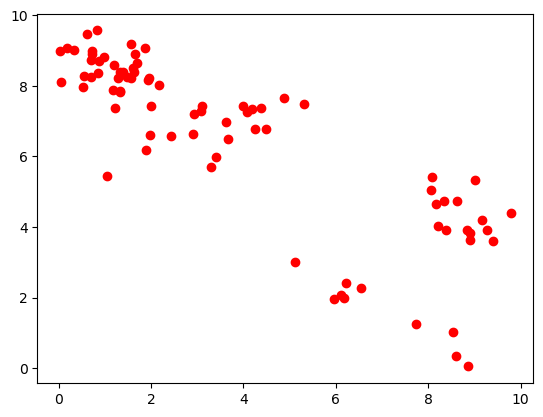

In [35]:
# 우선 2차원 공간에서 clustering 해보자 -> x 변수 두개만 쓰자
# x1=speed, x2=strength
plt.scatter(psysed['speed'],psysed['strength'],color='red')
plt.show()

In [36]:
X=psysed[['speed','strength']]
X

,speed,strength
0,6.11,2.07
1,0.33,9.01
2,8.90,3.83
3,8.61,0.36
4,1.69,8.64
...,...,...
75,1.60,8.51
76,1.66,8.91
77,1.05,5.46
78,0.87,8.70


In [38]:
# 두 변수다 0~10 이니까 표준화 할 필요는 없지만 표준화 해보자
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X) # fit_transform : 표준화 시켜주는 것
X_scaled

array([[ 0.72019914, -1.79539379],
       [-1.1430587 ,  1.05595396],
       [ 1.6195916 , -1.07228546],
       [ 1.52610638, -2.49795922],
       [-0.70464507,  0.90393691],
       [-0.64339614,  1.08060518],
       [ 1.59702629, -1.03941681],
       [ 1.38104308, -0.73538263],
       [ 1.34558329, -0.57103978],
       [-0.61760711,  0.73548521],
       [-0.64017251, -0.10266284],
       [-0.74332862,  0.72726828],
       [ 1.90649475, -0.84220553],
       [ 0.66862098, -1.83647945],
       [-0.25656064,  0.34927983],
       [-0.15018081, -0.18894285],
       [ 1.35525408, -0.41902273],
       [ 1.65505171, -0.45189125],
       [-0.18564076, -0.30809134],
       [ 0.46553245,  0.43145115],
       [-0.82391936,  0.56703412],
       [-0.86905024,  0.58757685],
       [-0.97542997,  0.7888967 ],
       [-1.04957345,  1.24905647],
       [ 1.45196303, -1.03941681],
       [-0.08248465,  0.22602264],
       [ 0.19797108,  0.14385133],
       [ 0.75565897, -1.65570232],
       [ 1.60992081,

In [40]:
# clustering 해보자
kmeans_3=KMeans(n_clusters=3,random_state=0,n_init=10,max_iter=300) 
# n_init:  / max_iter= 중심점 옮겨가기 300번 해서 가장 평균 거리 짧은 것을 선택해라
kmeans_3.fit(X_scaled)

KMeans(n_clusters=3, random_state=0)

In [41]:
# 여기선 예측 성과라는게 없음 unsupervised learning 이니까. 
# 각 그룹에 누가 들어가 있는지 알아야 함. 
# 1) 각 id 가 1,2,3 그룹 중에 어디에 배정이 되었는지 알아야 한다.
# 2) 중심점의 위치 <- 그래야 거리를 계산 할 수 있다.
# 3) elbow -> Within S.S= 평균거리 <- 제일 작을 때 elbow 맞나(?)                                                      

In [42]:
# k=3 일 때 WSS
kmeans_3.inertia_

19.96390936813341

In [43]:
# 이렇게 k = 2, 4,5, ,,, 다 구해서 elbow 구해야함 그림 그려서

# 2) 중심점의 위치
kmeans_3.cluster_centers_

array([[-0.88037896,  0.83773008],
       [ 1.34274643, -1.3018723 ],
       [-0.13776986,  0.16131274]])

In [44]:
kmeans_3.labels_

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 0, 0,
       0, 0, 1, 2, 2, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 0, 2, 2, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 2, 0, 1])

In [45]:
# 그룹 0,1,2
# 1번학생은 1그룹으로, 2번 학생은 0그룹, .... 이렇게 간 것임

In [47]:
# 그룹 0, 1, 2 는 각각 어떤 특징의 애들이야?
# 그러려면 그룹 배정(kmeans_3.labels_)결과를 원래 표에 한 컬럼으로 추가 해야함
df1=pd.DataFrame(kmeans_3.labels_,columns=['cluster_3']) # kmeans_3.labels_ 이 array를 df1 이라는 데이터 프래임으로 만들겠다.
df1

,cluster_3
0,1
1,0
2,1
3,1
4,0
...,...
75,0
76,0
77,2
78,0


In [50]:
psysed_new=pd.concat([psysed,df1],axis=1) # 이 두개를 나란히 엮어라 : axis=1
psysed_new

,id,flexibility,speed,strength,cluster_3
0,1,3.600000,6.11,2.07,1
1,2,1.120000,0.33,9.01,0
2,3,8.690000,8.90,3.83,1
3,4,2.670000,8.61,0.36,1
4,5,2.780000,1.69,8.64,0
...,...,...,...,...,...
75,76,2.440000,1.60,8.51,0
76,77,2.340000,1.66,8.91,0
77,78,5.080000,1.05,5.46,2
78,79,1.670000,0.87,8.70,0


In [51]:
pd.value_counts(psysed_new['cluster_3'])

0    35
1    25
2    20
Name: cluster_3, dtype: int64

In [54]:
psysed_new.groupby('cluster_3')[['speed','strength']].mean()

,speed,strength
cluster_3,,
0,1.144857,8.478857
1,8.041200,3.271200
2,3.448500,6.832500


In [ ]:
# 시험문제 : 근력운동이 많이 필요한 그룹은? 1 그룹
# 순발력이 늦은 애들은? 0그룹

In [55]:
# elbow 찾기 위해서 k=4 일 때 해보자.
kmeans_4=KMeans(n_clusters=4,random_state=0,n_init=10,max_iter=300) 
kmeans_4.fit(X_scaled)
kmeans_4.inertia_

10.56602770413063

In [56]:
# elbow 찾기 위해서 k=5 일 때 해보자.
kmeans_5=KMeans(n_clusters=5,random_state=0,n_init=10,max_iter=300) 
kmeans_5.fit(X_scaled)
kmeans_5.inertia_

8.038921886078736

In [ ]:
# 오잉 이거 위에 inertia 해서 elbow 포인트 찾아서 그래프 그리는 것은 하지 않겠다.